## Exploratory Data Analysis
- How each attribute contributes to Heart Attack
- Correlation between different attributes

In [1]:
# required libraries and modules
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cardiovascular_disease_prediction.dataset import load_dataset
from cardiovascular_disease_prediction.utils import savefig

In [3]:
df = load_dataset()
df.head()

Attempting to load dataset from: C:\Users\visha\OneDrive\Documents\GitHub\Data-Science-Stuff\predicting_cardio_disease\data\raw\cardio_train.csv
Dataset loaded successfully from C:\Users\visha\OneDrive\Documents\GitHub\Data-Science-Stuff\predicting_cardio_disease\data\raw\cardio_train.csv


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


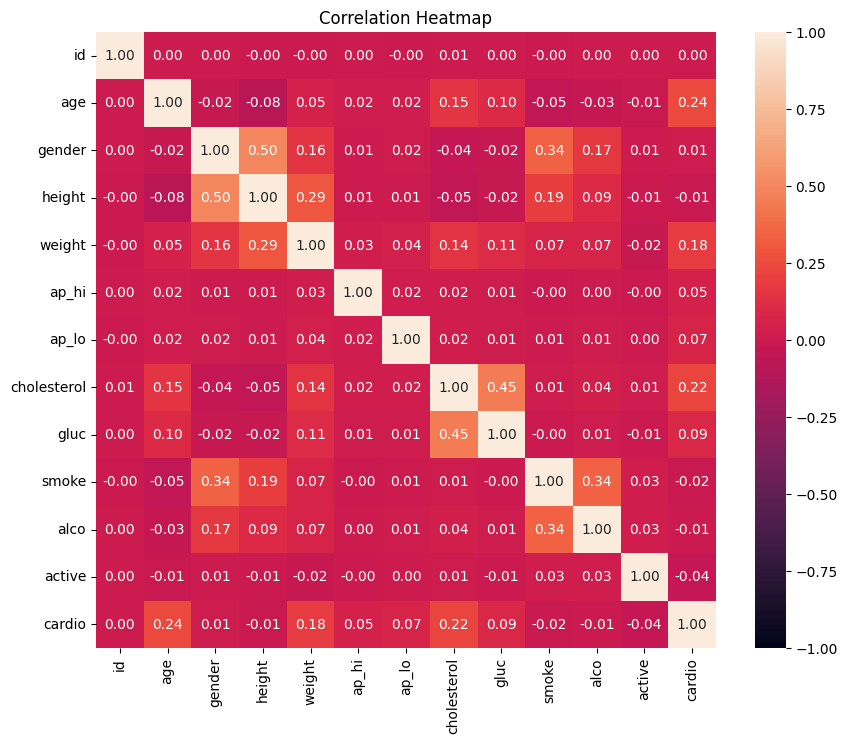

In [4]:
ht = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='rocket', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')

# saving figure
figname = 'corr_ht.png'
savefig(plt, figname)
plt.show()

In [34]:
# strong predictors of cardiovascular disease
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest
X = df[['ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y = df['cardio']
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Feature importance
importances = rf.feature_importances_
features = X.columns
feat_imp = pd.DataFrame({'features':features, 'imp':importances})
feat_imp.sort_values(by='imp', ascending=False)

,features,imp
0,ap_hi,0.562839
1,ap_lo,0.271238
2,cholesterol,0.110273
3,gluc,0.024252
6,active,0.012797
4,smoke,0.009834
5,alco,0.008768


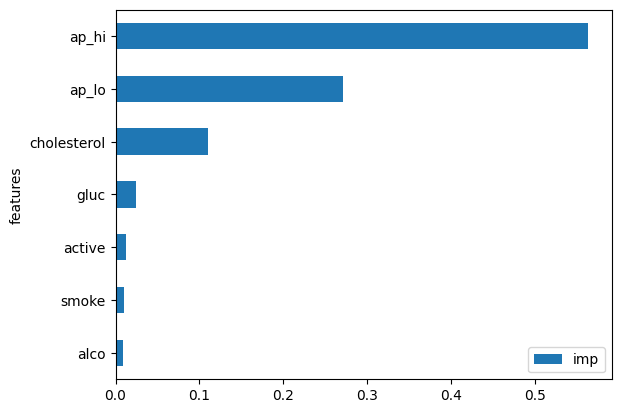

In [36]:
feat_imp.sort_values(by='imp', ascending=True).plot(kind='barh', y='imp', x='features')
plt.show()

### Interpetations:
- Almost all attributes are positively correlated with each other
- Relationship need to be looked into
    - Cardio vs Age/ Weight/ cholesterol
    - Smoke vs Gender/ Alcohol/ Height
    - Gluchose vs Cholestrol/ Age/ Weight
    - Gender vs Height

## Major Research Questions for EDA on Cardiovascular Disease Dataset

### Demographic Analysis
1. What is the distribution of age and gender among individuals with cardiovascular disease?
2. Is there a significant gender difference in the prevalence of cardiovascular disease?

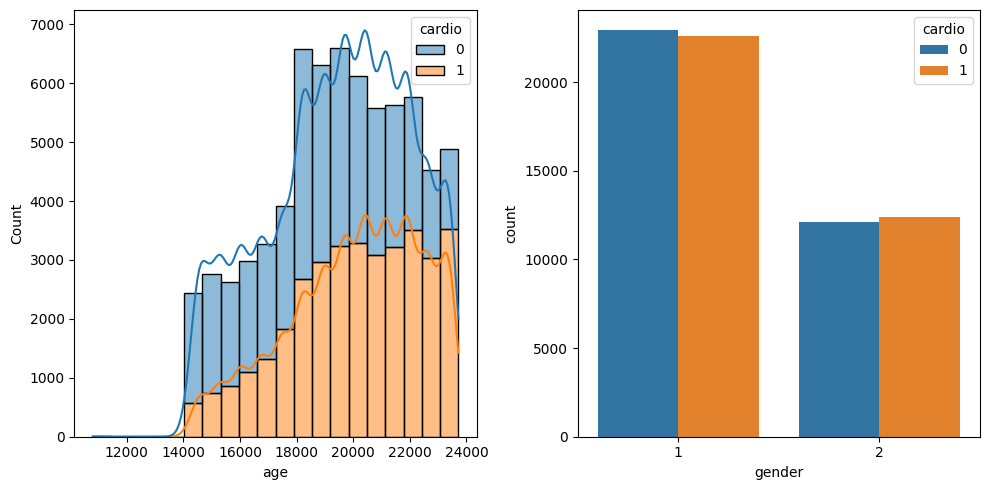

In [14]:
#1.
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=df, x='age', bins=20, hue='cardio', kde=True, multiple='stack', ax=ax[0])
sns.countplot(data=df, x='gender', hue='cardio', ax=ax[1])
plt.tight_layout()
plt.show()

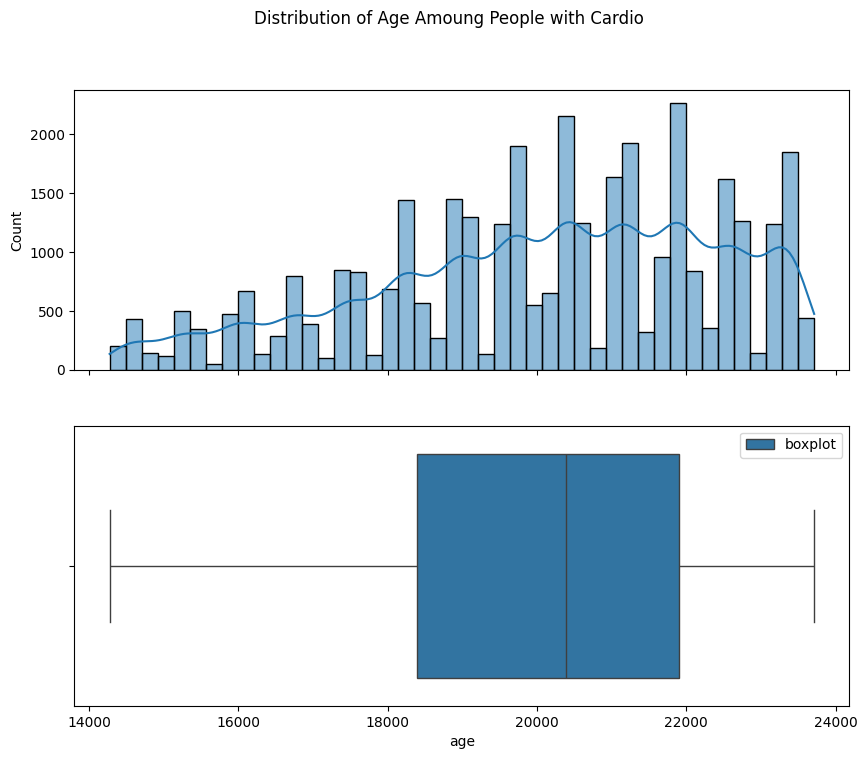

In [15]:
#1.
#bincount = 
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
sns.histplot(data=df[df['cardio']==1], bins='auto', kde=True, x='age', ax=ax[0], label='histogram')
sns.boxplot(data=df[df['cardio']==1], x='age', ax=ax[1], label='boxplot')
plt.suptitle("Distribution of Age Amoung People with Cardio")
plt.show()

### Physical Measurements
3. How do height and weight correlate with cardiovascular disease?
4. Is Body Mass Index (BMI) a strong predictor of cardiovascular disease in this dataset?

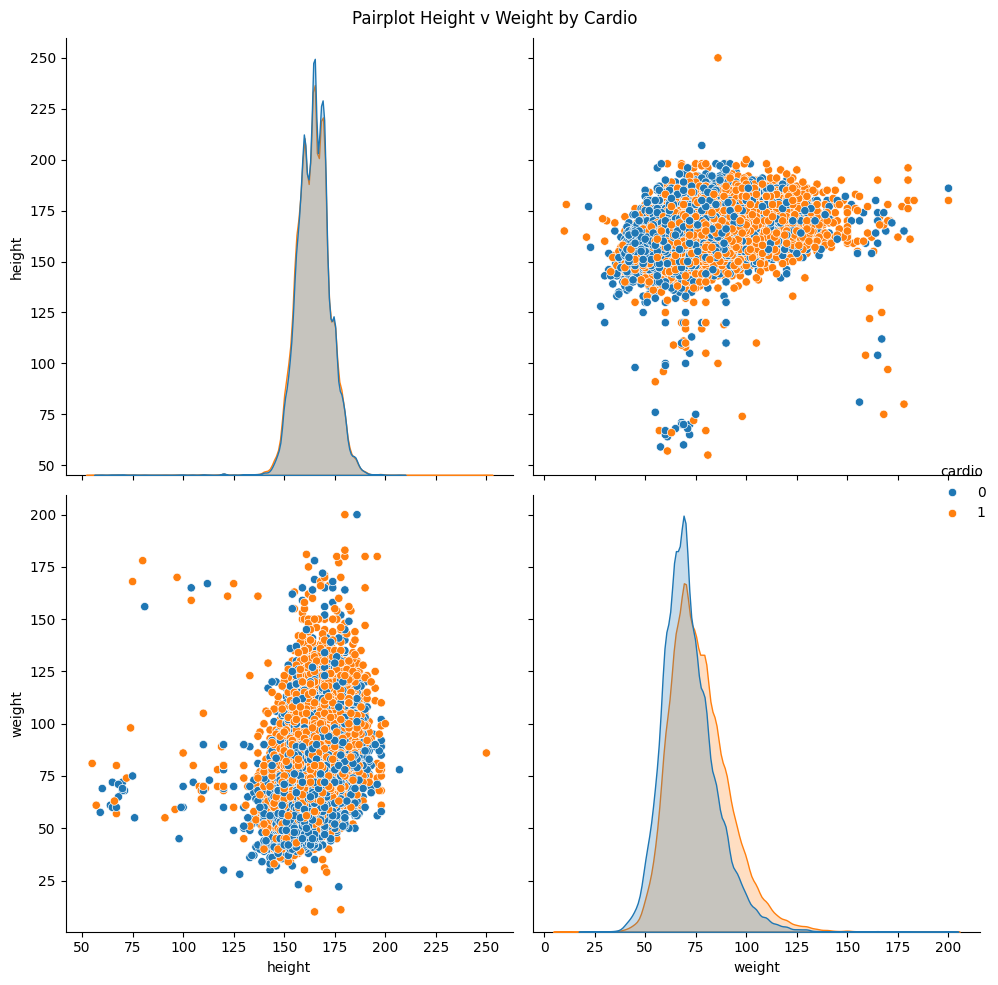

In [13]:
#3.
g = sns.pairplot(data=df, vars=('height', 'weight'), hue='cardio')
g.fig.set_size_inches(10, 10)
plt.suptitle('Pairplot Height v Weight by Cardio')
plt.tight_layout()
plt.show()

In [28]:
#4.
# bmi
height = df['height']/ 100 # cm to meters
bmi = round(df['weight']/ (height ** 2), 2)

bmi_cardio = pd.DataFrame({'bmi':bmi, 'cardio':df['cardio']})

print('Correlation bw BMI v Cardio:', bmi_cardio.corr()['cardio']['bmi'])

Correlation bw BMI v Cardio: 0.16563259433287963


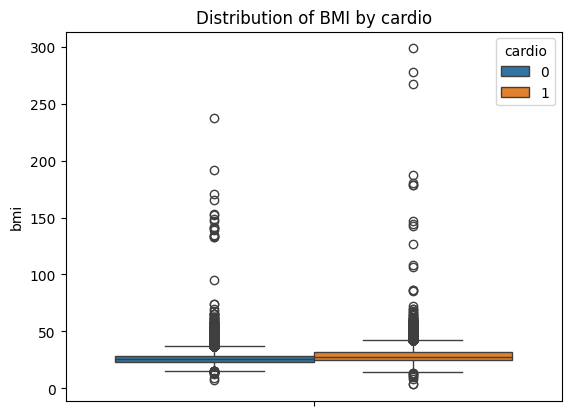

In [29]:
# distribution of bmi
sns.boxplot(data=bmi_cardio, y='bmi', hue='cardio')
plt.title('Distribution of BMI by cardio')
plt.show()

In [31]:
# stats bmi
bmi_cardio['bmi'].describe()

count    70000.000000
mean        27.556545
std          6.091405
min          3.470000
25%         23.880000
50%         26.375000
75%         30.220000
max        298.670000
Name: bmi, dtype: float64

### Blood Pressure Analysis
5. How do systolic (ap_hi) and diastolic (ap_lo) blood pressure levels differ between individuals with and without cardiovascular disease?
6. Are there thresholds for blood pressure values that significantly increase the risk of cardiovascular disease?

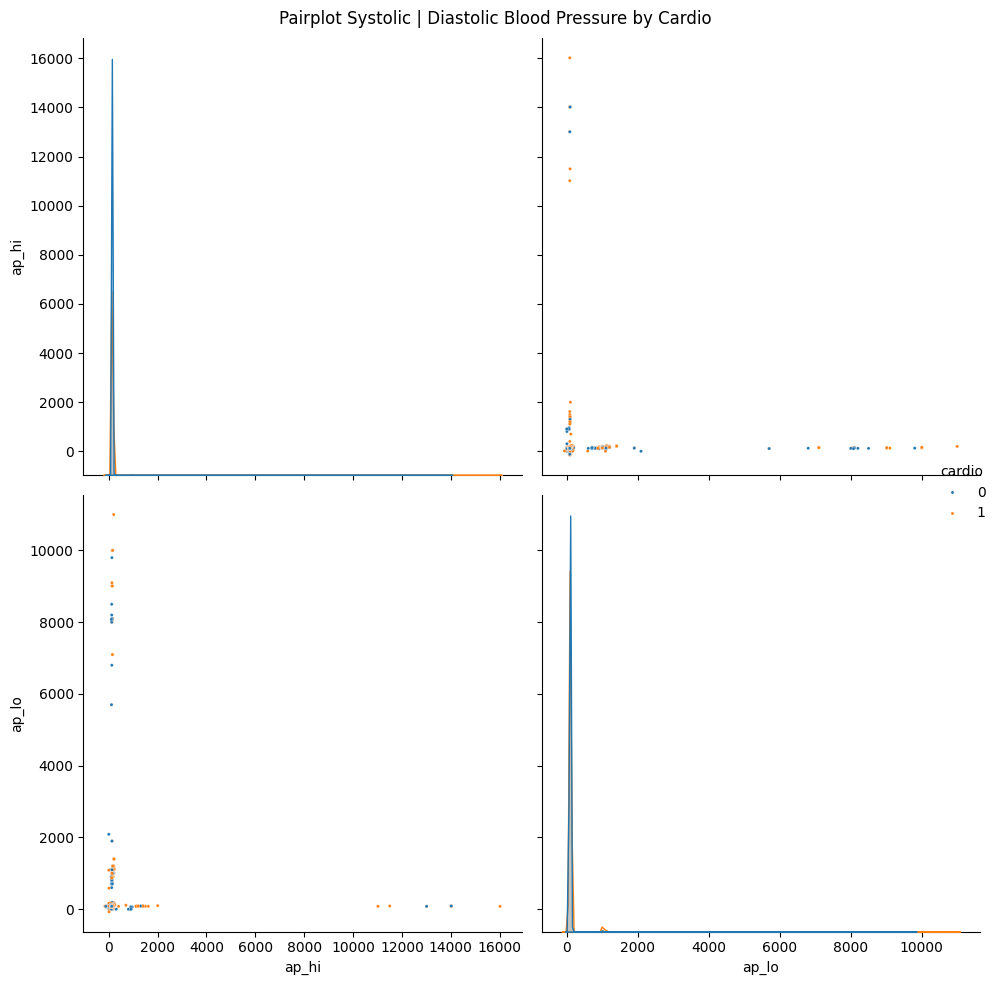

In [43]:
#5.
g = sns.pairplot(data=df, vars=['ap_hi', 'ap_lo'], plot_kws={'s': 5}, hue='cardio')
g.fig.set_size_inches(10, 10)
plt.suptitle('Pairplot Systolic | Diastolic Blood Pressure by Cardio')
plt.tight_layout()
plt.show()

In [41]:
df[['ap_hi', 'ap_lo']].describe()

,ap_hi,ap_lo
count,70000.000000,70000.000000
mean,128.817286,96.630414
std,154.011419,188.472530
min,-150.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


### Cholesterol and Glucose Levels
7. What is the relationship between cholesterol levels and cardiovascular disease?
8. How do abnormal glucose levels correlate with cardiovascular disease risk?

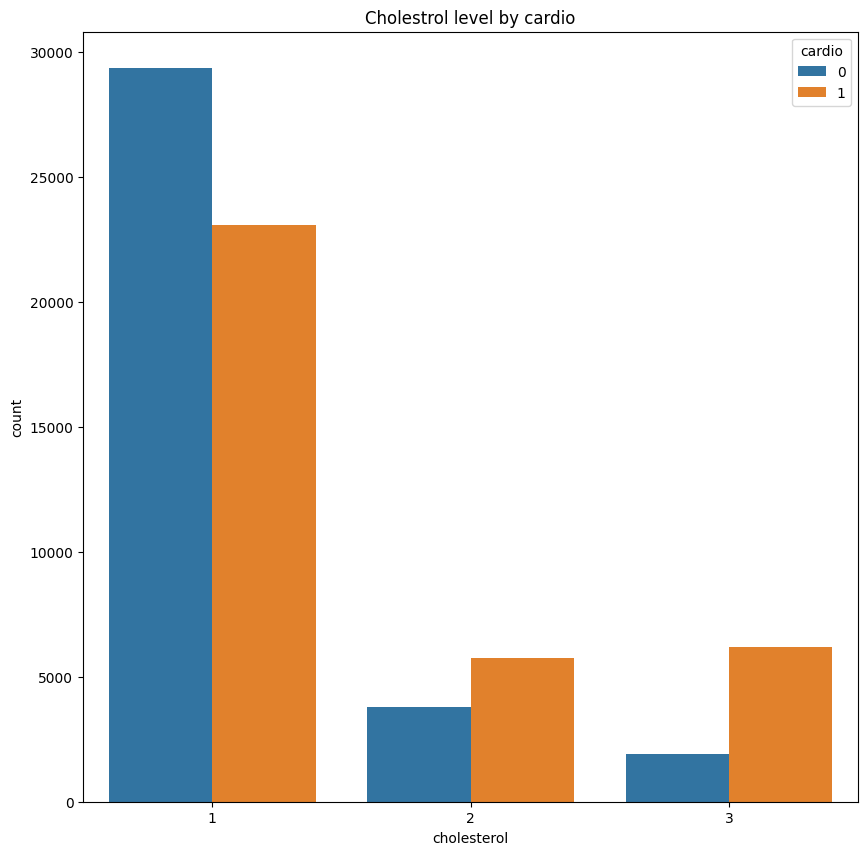

In [51]:
#7.
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='cholesterol', hue='cardio')
plt.title('Cholestrol level by cardio')
plt.show()

In [55]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['gluc'], df['cholesterol'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2:.2f}, p-value: {p_value:.2f}")

Chi-Square Statistic: 21733.25, p-value: 0.00


In [73]:
print('Correlation bw Gluc Cholesterol: ', df[['gluc', 'cholesterol']].corr()['gluc']['cholesterol'])

Correlation bw Gluc Cholesterol:  0.4515775236757577


### Lifestyle Factors
9. Does smoking or alcohol consumption impact the likelihood of cardiovascular disease?
10. Are individuals who are physically active less likely to have cardiovascular disease?

In [75]:
#9.
'''
    Null Hypothesis (H₀): Smoking has no impact on the likelihood of cardiovascular disease.
    Alternative Hypothesis (H₁): Smoking impacts the likelihood of cardiovascular disease.
'''
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table for smoking and cardiovascular disease
contingency_smoke = pd.crosstab(df['smoke'], df['cardio'])
chi2_smoke, p_value_smoke, _, _ = chi2_contingency(contingency_smoke)

print(f"Smoking vs. Cardiovascular Disease:")
print(f"Chi-Square Statistic: {chi2_smoke:.2f}, p-value: {p_value_smoke:.4f}")

# Check if hypothesis fails or passes
if p_value_smoke < 0.05:
    print("Result: Reject the null hypothesis. Smoking significantly impacts cardiovascular disease.")
else:
    print("Result: Fail to reject the null hypothesis. Smoking does not significantly impact cardiovascular disease.")

Smoking vs. Cardiovascular Disease:
Chi-Square Statistic: 16.68, p-value: 0.0000
Result: Reject the null hypothesis. Smoking significantly impacts cardiovascular disease.


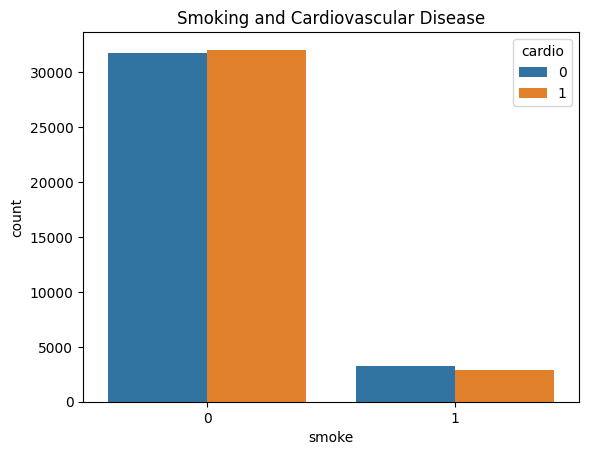

In [77]:
# Smoking vs. Cardiovascular Disease
sns.countplot(data=df, x='smoke', hue='cardio')
plt.title('Smoking and Cardiovascular Disease')
plt.show()

In [76]:
# Create a contingency table for alcohol consumption and cardiovascular disease
contingency_alco = pd.crosstab(df['alco'], df['cardio'])
chi2_alco, p_value_alco, _, _ = chi2_contingency(contingency_alco)

print(f"Alcohol Consumption vs. Cardiovascular Disease:")
print(f"Chi-Square Statistic: {chi2_alco:.2f}, p-value: {p_value_alco:.4f}")

# Check if hypothesis fails or passes
if p_value_alco < 0.05:
    print("Result: Reject the null hypothesis. Alcohol consumption significantly impacts cardiovascular disease.")
else:
    print("Result: Fail to reject the null hypothesis. Alcohol consumption does not significantly impact cardiovascular disease.")

Alcohol Consumption vs. Cardiovascular Disease:
Chi-Square Statistic: 3.70, p-value: 0.0545
Result: Fail to reject the null hypothesis. Alcohol consumption does not significantly impact cardiovascular disease.


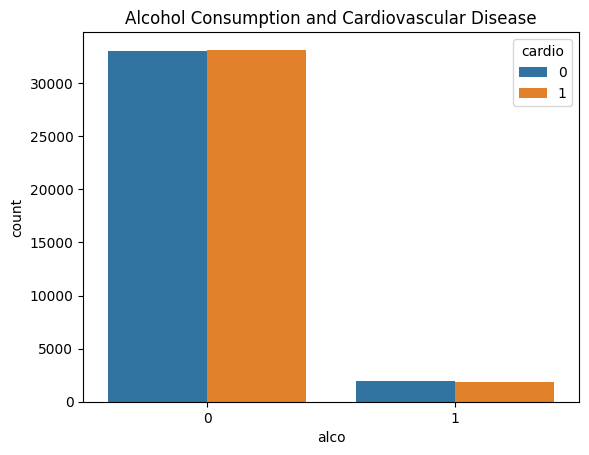

In [78]:
# Alcohol Consumption vs. Cardiovascular Disease
sns.countplot(data=df, x='alco', hue='cardio')
plt.title('Alcohol Consumption and Cardiovascular Disease')
plt.show()

In [79]:
#
# Create a contingency table for physical activity and cardiovascular disease
contingency_table = pd.crosstab(df['active'], df['cardio'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2:.2f}, p-value: {p_value:.4f}")

# Check if null hypothesis should be rejected
if p_value < 0.05:
    print("Result: Reject the null hypothesis. Physical activity significantly impacts the likelihood of cardiovascular disease.")
else:
    print("Result: Fail to reject the null hypothesis. Physical activity does not significantly impact the likelihood of cardiovascular disease.")

Chi-Square Statistic: 88.80, p-value: 0.0000
Result: Reject the null hypothesis. Physical activity significantly impacts the likelihood of cardiovascular disease.


In [81]:
print("Correlation bw active v cardio:", df[['active', 'cardio']].corr()['active']['cardio'])

Correlation bw active v cardio: -0.03565324811519037


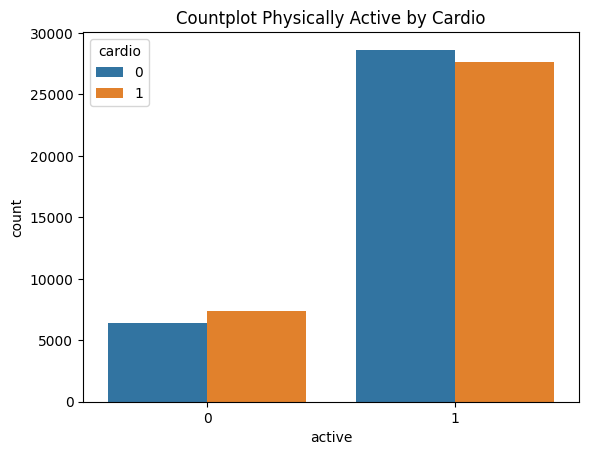

In [83]:
sns.countplot(data=df, x='active', hue='cardio')
plt.title('Countplot Physically Active by Cardio')
plt.show()

### Combined Factors
11. How do multiple risk factors (e.g., high blood pressure, smoking, cholesterol) interact to increase the risk of cardiovascular disease?
12. Can we identify specific combinations of attributes that are strong predictors of cardiovascular disease?

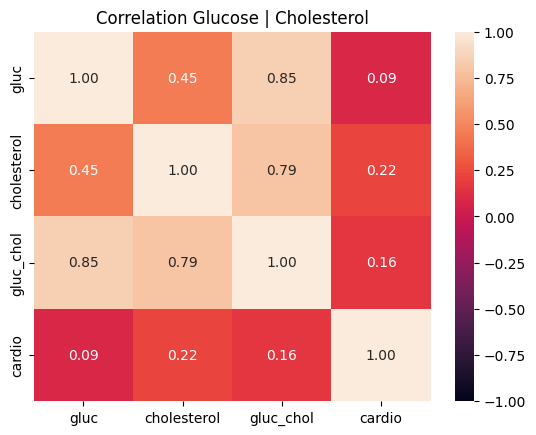

In [9]:
# Interaction 1
# glucose * cholesterol
df['gluc_chol'] = df['gluc'] * df['cholesterol']
corr = df[['gluc', 'cholesterol', 'gluc_chol', 'cardio']].corr()
sns.heatmap(corr, cmap='rocket', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation Glucose | Cholesterol')
plt.show()

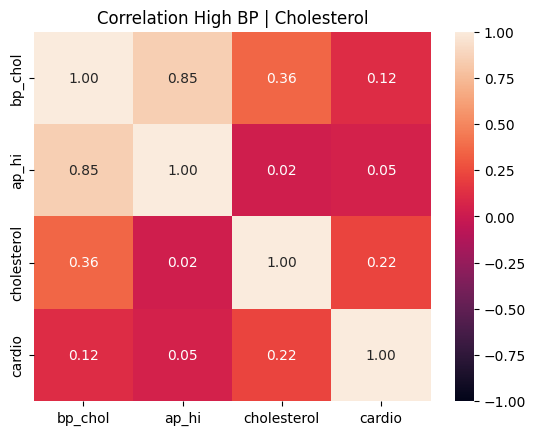

In [10]:
# Interaction 2
df['bp_chol'] = df['ap_hi'] * df['cholesterol']
corr = df[['bp_chol', 'ap_hi', 'cholesterol', 'cardio']].corr()
sns.heatmap(corr, cmap='rocket', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation High BP | Cholesterol')
plt.show()

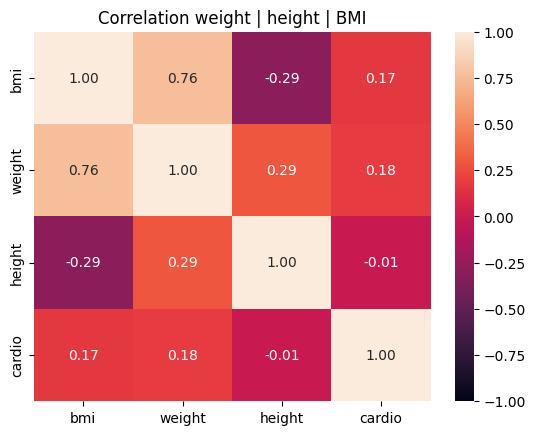

In [11]:
# Interaction 3
df['bmi'] = df['weight']/ ((df['height']/100) ** 2)
corr = df[['bmi', 'weight', 'height', 'cardio']].corr()
sns.heatmap(corr, cmap='rocket', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation weight | height | BMI')
plt.show()

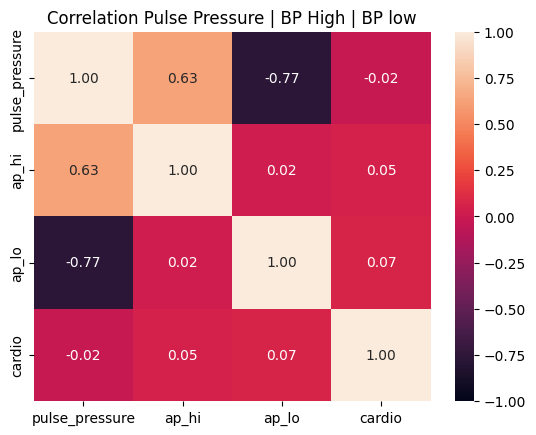

In [4]:
# Interaction 4
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
corr = df[['pulse_pressure', 'ap_hi', 'ap_lo', 'cardio']].corr()
sns.heatmap(corr, cmap='rocket', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation Pulse Pressure | BP High | BP low')
plt.show()

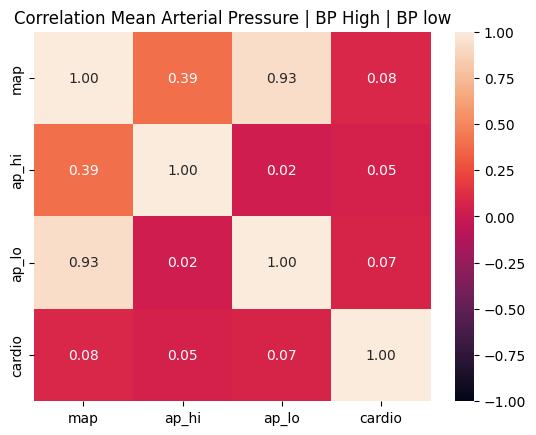

In [7]:
# Interaction 5
# MAP - mean arterial pressure
df['map'] = round(df['ap_lo'] + (df['ap_hi'] - df['ap_lo'])/ 3, 2)
corr = df[['map', 'ap_hi', 'ap_lo', 'cardio']].corr()
sns.heatmap(corr, cmap='rocket', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation Mean Arterial Pressure | BP High | BP low')
plt.show()

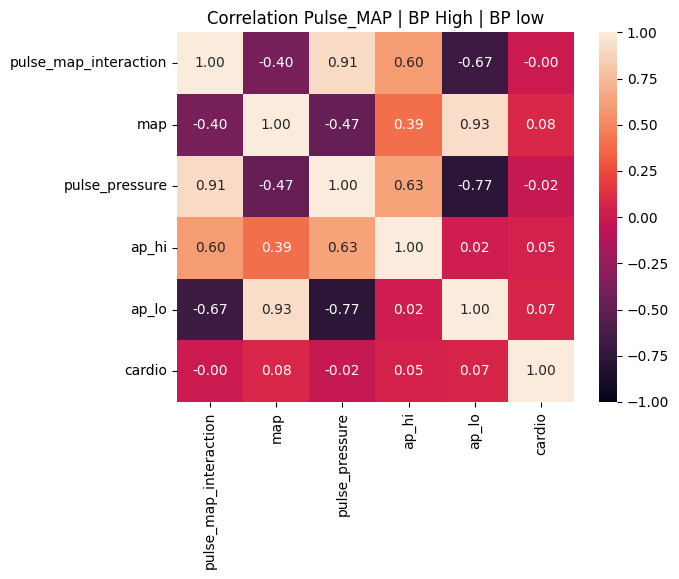

In [8]:
# Interaction 6
df['pulse_map_interaction'] = df['pulse_pressure'] * df['map']
corr = df[['pulse_map_interaction', 'map', 'pulse_pressure', 'ap_hi', 'ap_lo', 'cardio']].corr()
sns.heatmap(corr, cmap='rocket', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation Pulse_MAP | BP High | BP low')
plt.show()

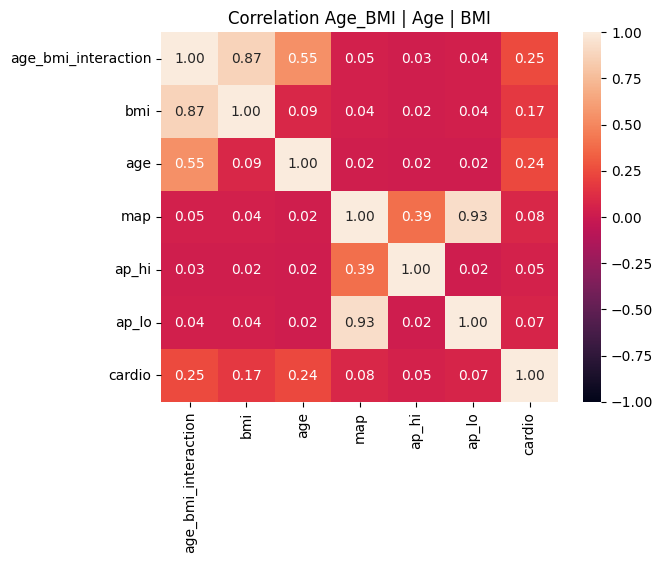

In [17]:
# Interaction 6
df['age_bmi_interaction'] = df['age'] * df['bmi']
corr = df[['age_bmi_interaction', 'bmi', 'age', 'map', 'ap_hi', 'ap_lo', 'cardio']].corr()
sns.heatmap(corr, cmap='rocket', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation Age_BMI | Age | BMI')
plt.show()

### Predictive Insights
13. What attributes are the most important for predicting cardiovascular disease in this dataset?

In [21]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'pulse_pressure', 'map', 'pulse_map_interaction', 'gluc_chol',
       'bp_chol', 'bmi', 'age_bmi_interaction'],
      dtype='object')

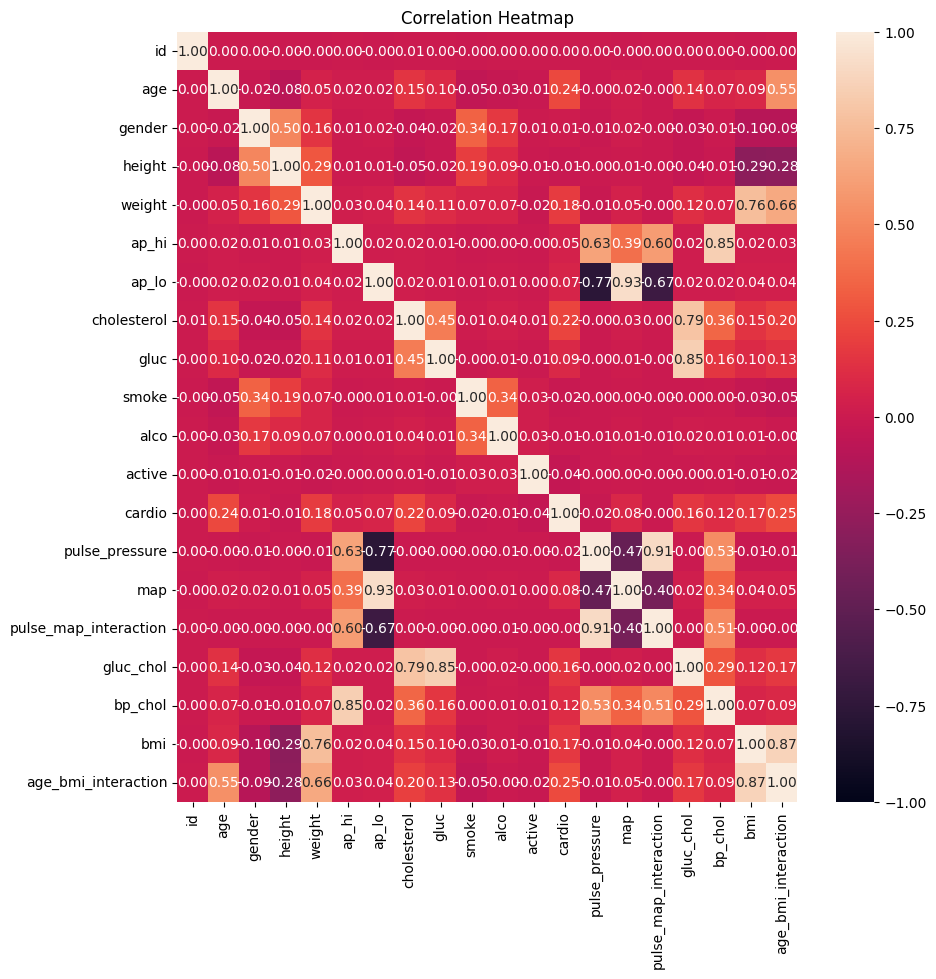

In [18]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='rocket', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# strong predictors of cardiovascular disease
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest
X = df.drop(labels='cardio', axis=1)
y = df['cardio']
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Feature importance
importances = rf.feature_importances_
features = X.columns
feat_imp = pd.DataFrame({'features':features, 'imp':importances})

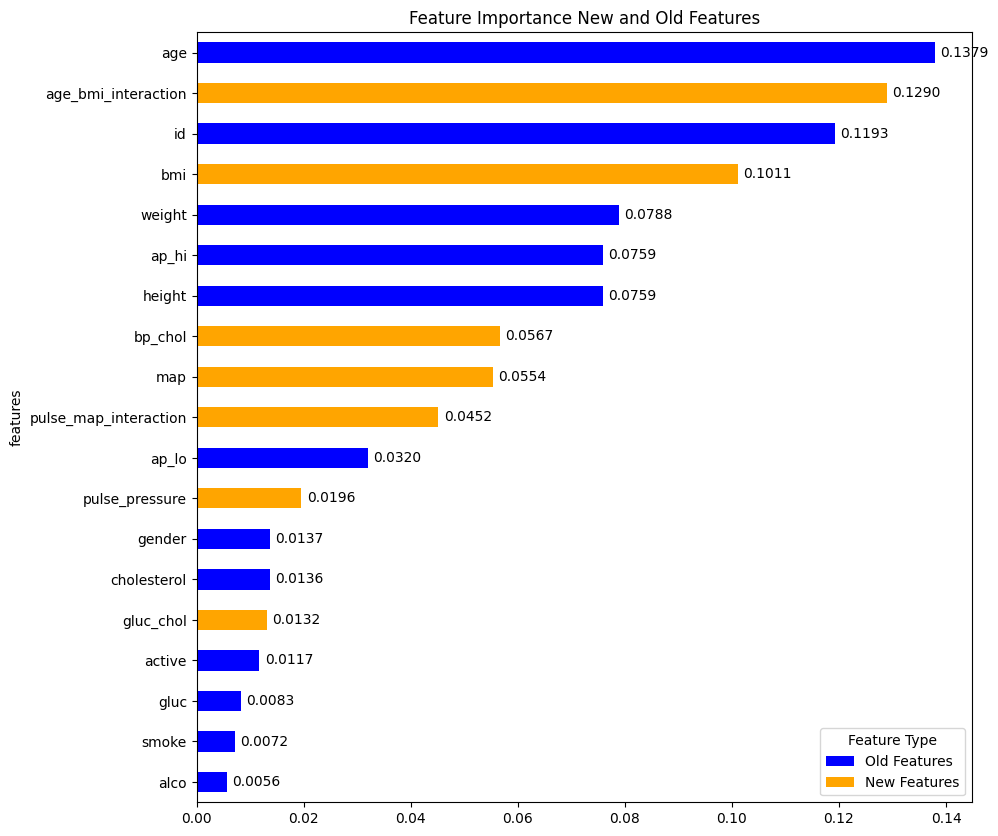

In [33]:
# mapping new features and old features
old_features = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
new_features = ['pulse_pressure', 'map', 'pulse_map_interaction', 'gluc_chol', 'bp_chol', 'bmi', 'age_bmi_interaction']

# Create the 'type' column based on feature classification
feat_imp['type'] = feat_imp['features'].apply(lambda x: 'old' if x in old_features else 'new' if x in new_features else 'unknown')

# Sort values for the bar chart
sorted_feat_imp = feat_imp.sort_values(by='imp', ascending=True)

# Define colors for new and old features
color_mapping = {'new': 'orange', 'old': 'blue'}
colors = sorted_feat_imp['type'].map(color_mapping)

# feature importance rank chart
sorted_feat_imp.plot(kind='barh', y='imp', x='features', color=colors, figsize=(10, 10))

# Add numbers on top of the bars
for i, v in enumerate(sorted_feat_imp['imp']):
    plt.text(v + 0.001, i, f'{v:.4f}', color='black', va='center', fontsize=10)

# legend style
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', label='Old Features'),
                   Patch(facecolor='orange', label='New Features')]
plt.legend(handles=legend_elements, title='Feature Type', loc='lower right')

# title
plt.title('Feature Importance New and Old Features')
plt.show()